# Master practicals : activation fMRI data analysis
Monday October 26 2022 
Sylvain Charron  
sylvain.charron@polytechnique.edu
___
Please write your name bellow  
name 1: sylvain CHARRON


### <a href='#Introduction'>0. Introduction</a> ###

### <a href='#WhydowedofMRI'>1. Why do we do functional MRI ?</a> ###

### <a href='#Analysisprinciple'>2. Analysis principle</a> ###

### <a href='#fMRIdata'>3. fMRI raw data</a> ###

### <a href='#Bloc'>4. Analysis of a bloc Paradigm</a> ###

## 0. Introduction

The purpose of this practical is for you to learn about fMRI data analysis by playing with some little code in Python.

At first, the code is already written in this notebook executable cells, you will have to modify some parameters and look at the output. Then you will start using tutorial notebooks from [**niLearn**](https://nilearn.github.io/stable/index.html), a pyhton module dedicated to neuroimaging data analysis.

Even if you never used Python, you should be able to adapt what you already learned in other programming language, using concepts such as index and variables.

I will answer your questions during the practicals.



### Getting started
For this practical session, we will use google colab to work on a python notebook. Please follow **very carefully** the steps described bellow to prepare your session.

In order to present some properties of fMRI data, I will use the software mango
http://ric.uthscsa.edu/mango/mango.html  
You don't have to use it yourself.

#### 0.0 document and data
You must have already downloaded the data and documents from the provided link. If not, do it now.  
Please rename the document `master_praticals_2022_charron.ipynb` using you name instead of mine.

#### 0.1 open the notebook
Connect to [google colab](https://colab.research.google.com) (create a google account if needed).  
To open the notebook `master_praticals_2022_yourname.ipynb`, click on **import** then select this notebook and open it.

#### 0.2 using a notebook
In a code cell, you can modify some code or write your own, then execute it using the `run` button on the action bar on top of the notebook.

In a text cell, you can write down your notes and comments. To make a text cell, you have to create a cell, then select in the middle of the toolbar on top of your screen the `Markdown` type instead of the `Code` type.

Both the comments and the code will constitute the practicals document you have to send me at the end of the lecture. So, start by writing your name instead of mine in the first cell.

#### 0.2 install the Statistics for NeuroImaging in Python module (nilearn)


In [13]:
!pip install nilearn

     |████████████████████████████████| 10.0 MB 4.4 MB/s 


#### 0.3 check your access to nilearn and other modules
Verify that importing the module does not generate errors.

In [14]:
import nilearn

In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [35]:
import nibabel as nib

#### 0.4 get access to time fMRI image files

Use the **file** button on the left column to import the three .nii files


## 1. Why do we do functional MRI ?

### Main goal
Activation fMRI is mostly used for detect the location of cognitive functions, under the hypothesis of functional specialization of brain areas.

To do so, the experimenter imposes on the subject a temporal variation related to the target process and looks for whichever part of the brain displays a signal in which a similar enough variation could be found.

The measurement is called the BOLD (Blood Oxygenen Level Dependent) signal, the temporal variations are implemented in an experimental design, usually contrasting 2 or more conditions under the "pure insertion" hypothesis (similar to "ceteris paribus").

Other uses of fMRI:
- resting state
- connectivity

### Clinical purpose

#### Question 0: List some clinical applications of functional MRI.

_Write down your answer in this Markdown cell_

## 2. Analysis Principle
In a typical experiment, we imposes on the subject 2 conditions, one that targets specifically a cognitive process and a control condition.
In each voxel, the time series of measurements is fitted one a linear model describing the conditions and potential confounds.

### 2.0 Preprocessing
As usual, before any analysis, preprocessing of data is required:
1. Spatial processing to take into account head movements and inter subject anatomical variability
2. Spatial Filtering
 - for SNR purpose
 - for the biological properties of the data
 - because the data have been modified due to the spatial processing
 - in order to assess good statistical properties for the data to be processed with inferential statistical models
3. Frequency Filtering
4. Temporal processing (e.g. whitening)

### 2.1 Linear multiple regression model
$$\Large Y = \beta X + \epsilon$$
In each voxel, the data $\Large Y$ is fitted on a linear model $\Large X$ and the regression coefficients are computed in order to minimize the residual error $\Large \epsilon$.

$\Large X$ is a matrix of **regressors $\Large X_i$**, each describing a modulation that is supposed to participate to the variance of the signal.

$\Large X$ is made of regressors of interest that model exprimental conditions, and nuisance regressors that model confounds.

One of the most important part of activation fMRI analysis is to build a linear model $\Large X$ consistent with the experimental paradigm, your hypothesis and the statistical comparisons.

###2.2 Statistical detection of "activated" voxels
Each $\Large \beta_i$ describe how much a regressor contributes to the signal, i.e. how much the signal in the voxel changes relatively to the modulation induced by the difference between the experimental conditions (in easy cases: Test vs. Control).

An "activation map" is made of voxels that actually display a high enough contrast between conditions, here statistical procedures are required.

Basically, the activation map shows the voxels surviving a threshold applied on a linear combination (a "contrast") of images made out of the $\Large \beta_i$.

### 2.3 Further analysis

Extraction of signal or statistical properties fom a Region of Interest.
Correlation between activations and behavioral data.
Functionnal connectivity.
...

## 3. fMRI raw data

### The analysis requires:
- the time series of BOLD signal
- the time series of what happened to the subject
- both to be synchronized!

### Thus, a typical activation dataset is made of :

- a description of the experimental paradigm with precise timing information.

- functional MRI data: either a 4D image containing a time series of MRI volumes or a series of 3D volumes temporally organized.

- a structural image: a high resolution anatomical scan used for preprocessing and localization of activations.

- additionally, you might get images for artefact removals purpose (B0 maps).

See the organization of files at the [Brain Imaging Data Structure project](http://bids.neuroimaging.io/).

### 3.0. fMRI stimulation data

The experimental paradigm has to be described as a time series of conditions. Depending on the software you will us, the exact form varies.

#### [FMRIB Software Library (FSL)]()
cf [FEAT documentation](http://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FEAT/UserGuide#FILM_General_Linear_Model)

One text file where each entry (separated with comma or newline) represents a volume and the presenc eof the condition is notes with 0 (absent) or 1(present) or any number if magnitude is required.
Or one text file per regressor, with 3 columns:
1. Starting second
2. Duration of block/event (in seconds)
3. Magnitude of regressor

#### [Statistical Parametric Mapping (SPM)](http://www.fil.ion.ucl.ac.uk/spm/)
A matlab structure with fields describing the type of regressor, its name, the onsets, durations et parametric modulation if needed.

#### [Statistics for NeuroImaging in Python (Nilearn)](https://nilearn.github.io/stable/index.html)
cf [nilearn documentation](https://nilearn.github.io/stable/modules/generated/nilearn.glm.first_level.compute_regressor.html)

array-like of shape (3, n_events) yields description of events for this condition as a (onsets, durations, amplitudes) triplet



### 3.1 Describe an actual paradigm

The description of this classical auditory stimulation dataset comes from the SPM manual:
>This data set comprises whole brain BOLD/EPI images acquired on a
modified 2T Siemens MAGNETOM Vision system. Each acquisition consisted
of 64 contiguous slices (64×64×64 3×3mm×3 mm3 voxels). Acquisition took
6.05s, with the scan to scan repeat time (TR) set arbitrarily to 7s.
96 acquisitions were made (TR=7s) from a single subject, in blocks of 6,
giving 16 42s blocks. The condition for successive blocks alternated
between rest and auditory stimulation, starting with rest. Auditory
stimulation was bi-syllabic words presented binaurally at a rate of 60
per minute. The functional data starts at acquisition 4

>To avoid T1 effects in the initial scans of an fMRI time series we
recommend discarding the first few scans. To make this example simple,
we’ll discard the first complete cycle (12 scans, 04-15), leaving 84
scans, image files 16-99.

#### Practice : try to decypher the description above in order to build an array with as much columns as you have periods of auditory stimulations and for each column, 3 lines, the first one being the time at which the stimulation begins, and the second one the duration of said stimulation. Amplitude can be set as 1.

#### Question 1: Write this array in the following text cell

_Write down your comments in a **text cell** like this one_

In [17]:
# You can use python to do calculations
1+1

2

In [18]:
3*4

12

### 3.2. Convolution with the Haemodynamic Response Function (HRF)
____
Since the BOLD signal is delayed relatively to the neural activity, the events stored in the paradigm descriptions are not accurately synchronous with the recorded signal. The the Haemodynamic Response Function is the transfer function that describe the recorded answer to a single event. Thus, through a convolution, you can predict the evolution of the BOLD signal from the time series of cerebral events you expect your paradigm to elicit.

Let's use python to look at the shape of this transfer function !  
(slightly adapted from https://nilearn.github.io/stable/auto_examples/04_glm_first_level/plot_hrf.html#sphx-glr-auto-examples-04-glm-first-level-plot-hrf-py)

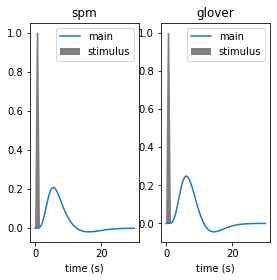

In [20]:
frame_times = np.linspace(0, 30, 61)
onset, amplitude, duration = 0., 1., 1.
exp_condition = np.array((onset, duration, amplitude)).reshape(3, 1)

stim = np.zeros_like(frame_times)
stim[(frame_times > onset) * (frame_times <= onset + duration)] = amplitude

hrf_models = ['spm', 'glover']


from nilearn.glm.first_level import compute_regressor

fig = plt.figure(figsize=(9, 4))
for i, hrf_model in enumerate(hrf_models):
    # obtain the signal of interest by convolution
    signal, name = compute_regressor(
        exp_condition, hrf_model, frame_times, con_id='main',
        oversampling=16)

    # plot this
    plt.subplot(1, 4, i + 1)
    plt.fill(frame_times, stim, 'k', alpha=.5, label='stimulus')
    for j in range(signal.shape[1]):
        plt.plot(frame_times, signal.T[j], label=name[j])
    plt.xlabel('time (s)')
    plt.legend(loc=1)
    plt.title(hrf_model)

# adjust the plot
plt.subplots_adjust(bottom=.12)
plt.show()

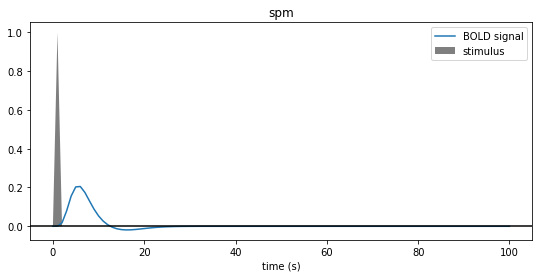

In [23]:
# Let's use the spm HRF as to plot the BOLD signal of a single phasic cerebral event
frame_times = np.linspace(0,100,101)

onset = np.array([0])
amplitude = np.array([1])
duration = np.array([1])

stim = np.zeros_like(frame_times)

for i in range(onset.shape[0]):
  stim[(frame_times > onset[i]) * (frame_times <= onset[i] + duration[i])] = amplitude[i]

hrf_model = 'spm'

# obtain the signal of interest by convolution
exp_condition = np.array((onset, duration, amplitude)).reshape(3, 1)
signal, name = compute_regressor(
    exp_condition, hrf_model, frame_times, con_id='main', oversampling=16)

# plot this
fig = plt.figure(figsize=(9, 4))
plt.fill(frame_times, stim, 'k', alpha=.5, label='stimulus')

plt.plot(frame_times, signal, label='BOLD signal')

plt.axhline(y=0, color='k')
plt.xlabel('time (s)')
plt.legend(loc=1)
plt.title(hrf_model)

# show the plot
plt.show()

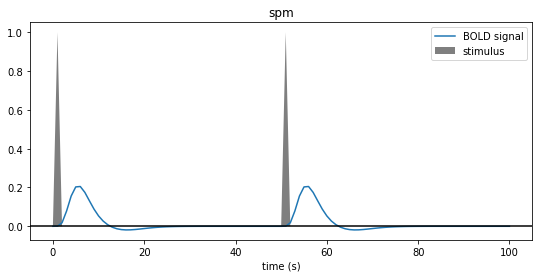

In [24]:
# now, let's add another single phasic cerebral activity
frame_times = np.linspace(0,100,101)

onset = np.array([0, 50])
amplitude = np.array([1, 1])
duration = np.array([1,1])

stim = np.zeros_like(frame_times)

for i in range(onset.shape[0]):
  stim[(frame_times > onset[i]) * (frame_times <= onset[i] + duration[i])] = amplitude[i]

hrf_model = 'spm'

from nilearn.glm.first_level import compute_regressor
import matplotlib.pyplot as plt

# obtain the signal of interest by convolution
exp_condition = np.array((onset, duration, amplitude)).reshape(3, 2)
signal, name = compute_regressor(
    exp_condition, hrf_model, frame_times, con_id='main', oversampling=16)

# plot this
fig = plt.figure(figsize=(9, 4))
plt.fill(frame_times, stim, 'k', alpha=.5, label='stimulus')

plt.plot(frame_times, signal, label='BOLD signal')

plt.axhline(y=0, color='k')
plt.xlabel('time (s)')
plt.legend(loc=1)
plt.title(hrf_model)

# show the plot
plt.show()

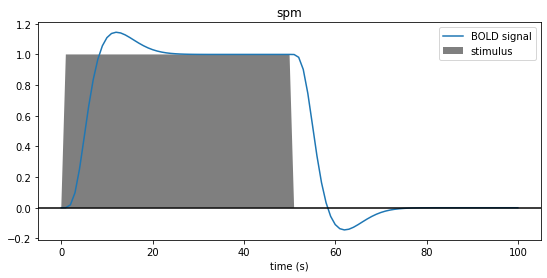

In [25]:
# now, let's see what happens to a sustained cerebral activity
frame_times = np.linspace(0,100,101)

onset = np.array([0])
amplitude = np.array([1])
duration = np.array([50])

stim = np.zeros_like(frame_times)

for i in range(onset.shape[0]):
  stim[(frame_times > onset[i]) * (frame_times <= onset[i] + duration[i])] = amplitude[i]

hrf_model = 'spm'

# obtain the signal of interest by convolution
exp_condition = np.array((onset, duration, amplitude)).reshape(3, 1)
signal, name = compute_regressor(
    exp_condition, hrf_model, frame_times, con_id='main', oversampling=16)

# plot this
fig = plt.figure(figsize=(9, 4))
plt.fill(frame_times, stim, 'k', alpha=.5, label='stimulus')

plt.plot(frame_times, signal, label='BOLD signal')

plt.axhline(y=0, color='k')
plt.xlabel('time (s)')
plt.legend(loc=1)
plt.title(hrf_model)

# show the plot
plt.show()

#### Practice: Explore the properties of the convolved signal:
1. copy paste the code in a new code cell (use the **Insert** menu, then **cell below**)
2. change appropriate parameters and look at the result
3. answer the following question

#### Question 2: use variations of the above code in order to explain why it would be impossible to discreminate close events

In [ ]:
# use a code cell to show the code that would generate good explanatory graphs

Then use a text cell to explain your approach and your interpretation

*texte en italique*###3.3 MRI raw images

The following code defines the variable data1_dirname which holds the path to this directory

In [32]:
import os # to have access to commands of the operating system
from os.path import join
# select the path from the drive or uploaded folder, using icons on the left
data1_dirname = '/content'
# show the value stored in the variable
# here a character string describing a path
print(data1_dirname)

/content


Let's have a look at what's in this data folder:

In [33]:
print(os.listdir(data1_dirname))

['.config', 'sample_data', 'run.nii.gz', 'functional.nii.gz', 'structural.nii.gz', '.ipynb_checkpoints']


Now you can check the first image's dimensions and type using the **nibabel** module.

In [36]:
#first, lets store the path to the image in a variable
anat_fname = join(data1_dirname,'structural.nii.gz')
print(anat_fname)

/content/structural.nii.gz


In [37]:
# then we laod the image using nibabel, and retrieve the data from the image
img = nib.load(anat_fname)
data_anat = img.get_data()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# in order to understand what is the type of object in which the data is stored
print("data type : ", type(data_anat))

data type :  <class 'numpy.ndarray'>


In [39]:
# these are the dimensions of this image
print("image dimensions: ", data_anat.shape)

image dimensions:  (256, 256, 54)


'data_anat' is a 3D array where the three dimensions are the number of acquired voxels in the x, y and z orientations.

####Practice/Question 3: do the same for the other images, using similar code in code cells, then describe your observations in a text cell.


In [ ]:
# put your code here

_then your observations here_

###3.4 fMRI raw images manipulation

This is all nice and well, but you migh want to actually look at some images

The following code describe how to select a slice in a 3D image and display it

In [44]:
# You can extract a slice (2D) using the dimensions of the np.array:
slice_data = data_anat[:, :, 30]
print(slice_data.shape)

(256, 256)


You can visualize the corresponding slice in the first volume using [matplotlib](http://matplotlib.org/), in the following way :

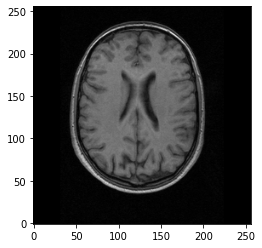

In [45]:
plt.imshow(slice_data[:,:].T, cmap='gray', origin= 'lower')

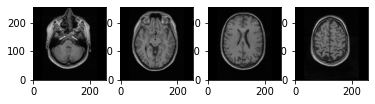

In [46]:
plt.figure()
plt.subplot(1,4,1)
plt.imshow(data_anat[:, :, 10].T, cmap='gray', origin= 'lower')
plt.subplot(1,4,2)
plt.imshow(data_anat[:, :, 20].T, cmap='gray', origin= 'lower')
plt.subplot(1,4,3)
plt.imshow(data_anat[:, :, 30].T, cmap='gray', origin= 'lower')
plt.subplot(1,4,4)
plt.imshow(data_anat[:, :, 40].T, cmap='gray', origin= 'lower')

#### Practice:
1. Play a bit with the matplotlib **imshow** function and the images 
1. Try to dispay the functional and the structural images side to side.

#### Question 4: Can you spot and explain some of the differences betweent these images?
As usual, use code and text cells to leave your answers

#### Question 5: How would you plot the time course of the BOLD signal in a given voxel?
Use code cells to display your code

_and text cells to explain how you proceeded_

## 4. Analysis of a bloc paradigm

The idea is to find voxels in which the regressor describing a condition has some effect on the BOLD signal. Each regressor is actually explaining a part of the variance in a Linear Model.
____

### 4.0 Analysis of the auditory stimulation experiment

Follow the tutorial
https://nilearn.github.io/stable/auto_examples/plot_single_subject_single_run.html


_you can use this text cell to take some notes while I explain what the script did_

### 4.1 Analysis of a random model

#### Practice: Create your own events.tsv file, picking reasonable random values for onset, duration and trial_type, then run the model again.

#### Question 6: What is your interpretation ?

_write down your interpretations in this cell_

### 4.2. Effect of preprocessing
Preprocessing usually includes of the following steps:
1. Interpolation after correction of movement effects
2. Interpolation after spatial normalization (allows for comparison despite anatomical individual differences)
3. Spatial smoothing using a gaussian kernel

We will check the effect of the last step.

Here is what a 2D gaussian kernel looks like:

(-1, 1)

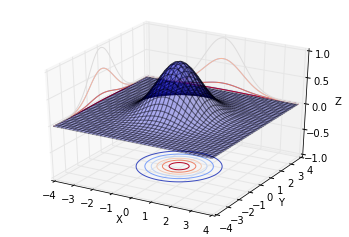

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-4, 4, 0.1)
Y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-0.5*(np.sqrt(X**2+Y**2)**2));

ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-1, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-4, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=4, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-4, 4)
ax.set_ylabel('Y')
ax.set_ylim(-4, 4)
ax.set_zlabel('Z')
ax.set_zlim(-1, 1)

#### Practice / Question 7: Try the example on https://nilearn.github.io/auto_examples/plot_nilearn_101.html
and write down your observations

_write down your interpretations in this cell_

#### Practice / Question 8: Generate 3 different smoothed images of the auditory temporal series data and apply to each the same model and threshold.
Explain your approach then write down your observations

_write down your interpretations in this cell_